# Natural Language Processing with Python

Natural Language Processing (NLP) is a field of study that focuses on a computer’s ability to interpret human language in order to process, analyze, and extract meaning from large volumes of text in natural language. 

Previously, you learned how to scrape text from web pages, how to write text into a file, how to read text from a file, and how to modify text values. Now, you will learn how to analyze texts using NLP algorithms.

In this session, you will first learn about natural language processing with Python using the leading NLP library `spaCy`. This library can be used to take on some of the most important tasks in working with text. `spaCy` has quickly become one of the most popular Python NLP frameworks; it is intuitive and it has excellent [documentation](https://spacy.io/usage).

We will look into how we can use `spaCy` for simple text mining processes such as analysis of the grammatical structure of the text, extracting components of the text, lemmatization, etc. Next, we will look into how we can use `spaCy` for more advanced text mining processes such as named entity recognition and sentiment analysis.  

To use `spaCy`, first import it to your codebase:

In [1]:
import spacy

For text analysis, `spaCy` relies on statistical language models and trained pipelines. It currently provides official support for more than twenty [languages](https://spacy.io/usage/models). A huge community of developers continuously helps with extending the language data of `spaCy` and improving its performance. `spaCy` also has models trained for mixed-language texts. 

Depending on the language of your text, its length, and complexity, you can choose and download a pre-trained language model to be used. To download a model you can either use [pip](https://spacy.io/usage/models#download-pip) or [spaCy's download command](https://spacy.io/usage/models#download). 

Suppose we want to use the `en_core_web_sm` model which is a relatively small model for the English language with a high efficiency rate. There are other models with higher accuracy but lower efficiency, see [here](https://spacy.io/models/en). Use the following command in your command line to download this language model.

```
python3 -m spacy download en_core_web_sm
```
Once downloaded, you can use the model in your Python script. There is no need to download it again and again.

To use a language model in Jupyter Notebook, it must be downloaded every time the kernel is restarted. You can download a language model in the Jupyter Notebook as shown below: 

In [2]:
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 15.7 MB/s eta 0:00:00 MB/s eta 0:00:0101
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


After the model is downloaded, it can be loaded and used for text analysis. To load a model,

In [3]:
nlp_en = spacy.load("en_core_web_sm")
nlp_en # pipeline initialized with English language model

Once a language model is loaded and is ready to be used, it is used to initialize spaCy's NLP [pipeline](https://spacy.io/usage/spacy-101#pipelines). Then you can feed you text into this pipeline that performs a few NLP tasks on the text, and returns a `Doc` object containing the results.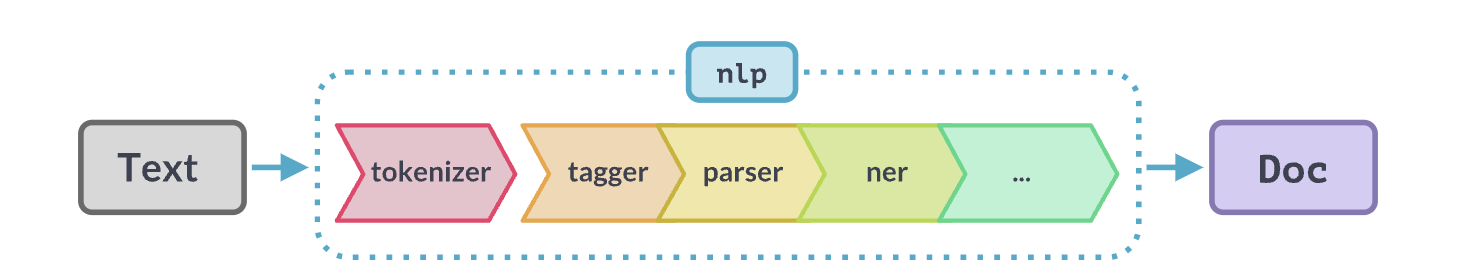

The first task is to break the text into pieces. This process is known as **tokenization**.

## Tokenization:

Tokenization is breaking the raw text into small chunks called **tokens**. A token may be a word, part of a word, or just characters like punctuation. Tokenization is the first step in the text analysis process. 

In the example below, we feed a text to spaCy's pipeline initialized with the loaded English language model. The resulting `Doc` object contains the list of tokens of the text.

In [4]:
# Feed the text to spaCy pipeline with the trained English model
doc_en = nlp_en("In this beautiful spring, we learn Python.")

print(type(doc_en)) # check the returned type

print("Tokens:")
for token in doc_en: # print tokens of the text
    print(token)

<class 'spacy.tokens.doc.Doc'>
Tokens:
In
this
beautiful
spring
,
we
learn
Python
.


Using `idx` member, you can get the index of the first character of the token in the text:

In [5]:
for token in doc_en:
    print(token, token.idx)

In 0
this 3
beautiful 8
spring 18
, 24
we 26
learn 29
Python 35
. 41


`spaCy` also returns a list of noun chunks found in the text. You can think of noun chunks as a noun plus the words describing the noun – for example, “the lavish green grass” or “the world’s largest tech fund”. Let's have a look at the noun chunks `spaCy` detected in our text; you can access them using the `noun_chunks` member of the returned spaCy `Doc` object.

In [6]:
print("Noun chunks:")
for chunk in doc_en.noun_chunks:
    print(chunk.text) # get the content of the noun chunk

Noun chunks:
this beautiful spring
we
Python


`spaCy` also splits your text into sentences. You can access the recognized sentences using the `sents` member of the spaCy `Doc` object. For example:

In [7]:
doc = nlp_en("It is Thursday and I have Python course. Today, I learn about NLP with Python. I believe spaCy is super cool!")

for sentence in doc.sents:
    print(sentence)

It is Thursday and I have Python course.
Today, I learn about NLP with Python.
I believe spaCy is super cool!


## Part of Speech Tagging

`spaCy` also identifies the role of each token in the sentence. `spaCy` provides a bunch of POS (Part of Speech) tags such as NOUN (noun), PUNCT (punctuation), ADJ (adjective), ADV (adverb), etc. The trained pipeline and statistical models enable `spaCy` to make classification of which tag or label a token belongs to. In simple language, we can say that POS tagging is the process of identifying a word as nouns, pronouns, verbs, adjectives, etc. To learn more about spaCy's part of speech tagging and its list of POS tags, see this [article](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/).

As you can see above, `spaCy` has broken our text into tokens. Each token is an instance of class `Token` that has a member `pos_` which contains the POS tag of the token.

Let's have a look at POS tags spaCy has given each token of our text
> "In this beautiful spring, we learn Python."

In [8]:
# Print the tokens and their part of speech tags
for token in doc_en:
    print(token, "->", token.pos_)

In -> ADP
this -> DET
beautiful -> ADJ
spring -> NOUN
, -> PUNCT
we -> PRON
learn -> VERB
Python -> PROPN
. -> PUNCT


`spaCy` assigns the POS tags defined within Stanford typed dependencies [manual](https://www.studocu.com/de/document/hochschule-harz-fh/ecuanciones/dependencies-manual/92490241)

You can then filter out any linguistic feature you are interested in, for example all the verbs in the text:

In [9]:
verbs = [token for token in doc_en if token.pos_ == "VERB"]
print("Verbs:", verbs) # list of verbs given in the text

Verbs: [learn]


You can access a token's all morphological features using its `morph` member as shown below. 

In [11]:
for token in doc_en:
    print(token, '->', token.pos_, "\n", '\t', token.morph)

In -> ADP 
 	 
this -> DET 
 	 Number=Sing|PronType=Dem
beautiful -> ADJ 
 	 Degree=Pos
spring -> NOUN 
 	 Number=Sing
, -> PUNCT 
 	 PunctType=Comm
we -> PRON 
 	 Case=Nom|Number=Plur|Person=1|PronType=Prs
learn -> VERB 
 	 Tense=Pres|VerbForm=Fin
Python -> PROPN 
 	 Number=Sing
. -> PUNCT 
 	 PunctType=Peri


**Exercise 1:** In the following sentence

> It is a beautiful spring day. We are learning NLP with Python. I am enjoying it.

1. Find all proper nouns
   
Hint: You need to find the tokens which have the POS tag `PROPN` 

In [ ]:
# PUT YOUR CODE HERE

2. Find all 1st person plural nominative pronouns of the text and their position in the text.

Hint: `morph`member of a token is of type `MorphAnalysis` which has a method `to_dict()`. You can use this method to get the morphological features of a token as a dictionary.

In [ ]:
#PUT YOUR CODE HERE

## Dependency Graph

`spaCy` also identifies the grammatical dependency between the tokens within the text. For example, which noun an adjective is describing. For that, `spaCy` uses a [dependency parser](https://spacy.io/api/dependencyparser).  

### Visualize Dependency Graph

To see the dependency between the tokens, we can visualize it using [displacy](https://spacy.io/usage/visualizers) class of `spaCy`.

In [12]:
from spacy import displacy

In a Python script, use the `displacy.serve()` function to visualize the dependency graph of the text. This will spin up a simple web server and let you view the result straight from your browser. In your python script, you can visualize the dependency graph using:

```
displacy.serve(doc_en, style="dep")
```

Jupyter Notebook is already rendered in a browser, so for displaying the dependency graph within Jupyther notebook, you should use `displacy.render()` function, as shown below: 

In [13]:
displacy.render(doc_en, style = "dep")

You can add various visualization options such as line color, background color, font, etc, through the "options" parameter, as shown below:

In [14]:
vis_options = {'color':'white', 'bg':'black', 'compact': True, 'font':'Times'}
displacy.render(doc_en, style = "dep", options=vis_options)

The `displacy.render()` function returns the graph in the [SVG](https://en.wikipedia.org/wiki/Scalable_Vector_Graphics), Scalable Vector Graphics, format that can be rendered on web. In order to store the resulting dependency graph, you can store it as a `.svg` file that can be embedded in any webpage and can be viewed using any web browser. 

In Jupyter Notebook, for SVG to be returned instead of displayed, you should set the parameter `jupyter = False`

In [15]:
svg = spacy.displacy.render(doc_en, style = "dep", jupyter = False)
with open("sentence_dep.svg", "w",  encoding="utf-8") as file:
    file.write(svg)

**Note:** To get the dependency graph returned as SVG in a Python script, there is no need to set `jupyter = False` parameter. You can get the dependency graph as SVG with

```
svg = spacy.displacy.render(doc_en, style = "dep")
```

**Note:** If you wish to convert an SVG file to an image file, such as PNG using Python, you should 
- install [cairo](https://www.cairographics.org/download/) on your system, then either
   - install `CairoSVG` Python package and use `svg2png` function to convert SVG to PNG
   - install `svglib` Python package and use `svg2rlg` function to convert SVG to PNG
More information on dependency and code snippets can be found [here](https://medium.com/@prasadfernando90/how-to-convert-svg-to-png-in-python-4c655c59a571)

**Exercise 2:** Having the following passage from "Emma" written by Jane Austen.

> "She was the youngest of the two daughters of a most affectionate, indulgent father; and had, in consequence of her sister's marriage, been mistress of his house from a very early period. Her motherhad died too long ago for her to have more than an indistinct remembrance of her caresses. Her place had been supplied by an excellent woman as governess, who had fallen little short of a mother in affection."

1. Find all adjectives in the text

In [ ]:
#PUT YOUR CODE HERE

2. For each sentence of the text, visualize the dependency.

In [ ]:
#PUT YOUR CODE HERE

**Note:** Each of the dependency tags has a meaning, `amod` stands for `adjective modifier`, `pobj` is `object of a proposition` and so on. To understand the meaning of dependency tags used by `spaCy`, see Stanford typed dependencies [manual](https://www.studocu.com/de/document/hochschule-harz-fh/ecuanciones/dependencies-manual/92490241). 

### Example: Analyze a German Text

Let's have a look at an example in German. To analyze texts in German, you need a model trained for German language texts. For higher accuracy, I have chosen the `de_core_news_lg`, there are other pre-trained models [available](https://spacy.io/models/de) that you can choose from. Again first, you should download the model and then load it.

In [ ]:
!python3 -m spacy download de_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 375.9/567.8 MB 13.9 MB/s eta 0:00:14:15

In [16]:
nlp_de = spacy.load("de_core_news_lg")

Now we can use this German-language model to analyze a German text:

In [17]:
doc_de = nlp_de("Heute ist ein kalter Tag.")
for token in doc_de:
    print(token, token.pos_)      

Heute ADV
ist AUX
ein DET
kalter ADJ
Tag NOUN
. PUNCT


Now let's have a look at the dependency graph of this German Text.

In [18]:
spacy.displacy.render(doc_de, style = "dep")  

**Note:** The German model is not as good as the English one, after all, German has a more complex grammatical structure. The separable verbs in German make things even more complex. The chosen model nonetheless has an accuracy rate of 98% for POS tagging.

In the next step of its default text analysis [pipeline](https://spacy.io/models#design-cnn), spaCy recognizes the named entities given in the text.

## Named Entity Recognition

[Named Entity Recognition](https://en.wikipedia.org/wiki/Named-entity_recognition) (NER) is probably the first step towards information extraction that seeks to locate named entities given in the text and to classify them into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. 

It helps with answering real-world questions, such as 

- How many times a certain organization was mentioned in a text?
- Were specific products mentioned in complaints or reviews?
- Does the tweet contain the name of a person? does the tweet contain the location of a person?

`spaCy` features an extremely fast statistical [entity recognition system](https://spacy.io/usage/linguistic-features#named-entities), that assigns labels to contiguous spans of tokens.  `spaCy` can recognize various types of named entities in a document by asking the model for a prediction. Because models are statistical and strongly dependent on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later depending on your use case.

`spaCy` recognizes the named entities in the text and tags them with their types. Using `ents` member of the spaCy `Doc` object, we can access the recognized named entities. For each named entity, its label indicating the type of the entity, as well as the start and end position of that named entity within the text is given: 

In [19]:
text = ("Over 100 Allied bombers and their crews were interned during the war. \
        Between 1940 and 1945, Switzerland was bombed by the Allies causing \
        fatalities and property damage. \
        Among the cities and towns bombed were Basel, Zurich, Geneva, among others.")

doc_wwII = nlp_en(text)

for entity in doc_wwII.ents: # get named entities, their labels, and their positions in the text
    print(entity.text, "->", entity.label_, ", position:", "[", entity.start_char, ",", entity.end_char, "]")

Between 1940 and 1945 -> DATE , position: [ 78 , 99 ]
Switzerland -> GPE , position: [ 101 , 112 ]
Basel -> GPE , position: [ 233 , 238 ]
Zurich -> GPE , position: [ 240 , 246 ]
Geneva -> GPE , position: [ 248 , 254 ]


In [21]:
test_dc = nlp_en("John ate an apple yesterday")

for entity in test_dc.ents: # get named entities, their labels, and their positions in the text
    print(entity.text, "->", entity.label_)

John -> PERSON
yesterday -> DATE


The accuracy of the named entity recognition (NER) using the chosen model `en_core_web_sm` is only 85%. For a better accuracy rate, you can use other models such as `en_core_web_trf` which has an accuracy rate of 90% for NER.

### Visualization of Named Entities in Text

The entity visualizer method of the `displacy` class, with visualization style parameter `style="ent"`, highlights named entities and their labels in a text. 

In a Python script, use the` displacy.serve()` function to get the visualization of the text with recognized named entities. It returns the text with tagged named entities as an HTML document. This function will spin up a simple webserver to let you view the result straight from your browser. It can be used as shown below:

```
displacy.serve(doc_wwII, style="ent")
```

Jupyter notebook is already running in the browser, and can directly render and display HTML documents. Therefore, to visualize the text with tagged named entities in Jupyter Notebook, you can use the `displacy.render()` function as shown below:

In [22]:
displacy.render(doc_wwII, style="ent")

You can store this annotated text with labeled named entities in an HTML file. The labeling of the named entities is defined as CSS (stylesheet) of the HTML document. The resulting HTML document can be opened in any browser and embedded in any website. 

In Jupyter Notebook, to get the HTML document from the `displacy.render()` function, you should use the `jupyter = False` parameter, as shown below:

In [23]:
# Get the HTML document with text and tagged named entities
html = displacy.render(doc_wwII, style="ent", jupyter = False)

# write the HTML document to a new file
with open("named_entities.html", "w", encoding = "utf-8") as output_file:
    output_file.write(html)

**Note:** To get the text with labeled named entities returned as HTML in a Python script, you do not need the `jupyter = False` parameter. Use the following command to get the HTML document.

```
html = spacy.displacy.render(doc_wwII, style = "ent")
```

In the previous session, you learned how to scrape text from web pages using the `requests` and `BeautifulSoup` libraries. You can now use `spaCy` to analyze your scraped text.

I have scraped the content of a New York Times [article](https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news) and saved the text in the `nyt_article.txt` file given in the `data` folder.

Now let's read the text from that file, and use `spaCy` for the recognition of its named entities

In [24]:
import os

# Read the nyt_article.txt file given in the data folder
with open(os.path.join("data", "nyt_article.txt"), "r") as text_file:
    text_en = text_file.read()    
text_en

'Peter Strzok, the F.B.I. senior counterintelligence agent who disparaged President Trump in inflammatory text messages and helped oversee the Hillary Clinton email and Russia investigations, has been fired for violating bureau policies, Mr. Strzok’s lawyer said Monday.Mr. Trump and his allies seized on the texts — exchanged during the 2016 campaign with a former F.B.I. lawyer, Lisa Page — in assailing the Russia investigation as an illegitimate “witch hunt.” Mr. Strzok, who rose over 20 years at the F.B.I. to become one of its most experienced counterintelligence agents, was a key figure in the early months of the inquiry.Along with writing the texts, Mr. Strzok was accused of sending a highly sensitive search warrant to his personal email account.The F.B.I. had been under immense political pressure by Mr. Trump to dismiss Mr. Strzok, who was removed last summer from the staff of the special counsel, Robert S. Mueller III. The president has repeatedly denounced Mr. Strzok in posts on 

The text is in English, so we use the English pre-trained model of `spaCy` to detect and visualize the named entities within the text.

In [25]:
random_text_doc_en = nlp_en(text_en) 

spacy.displacy.render(random_text_doc_en, style = "ent")

**Note:** As mentioned before, the accuracy of the NER process is dependent on the chosen model and its training samples. Still, the best English pre-trained model of spaCy has an accuracy rate of 90% for NER. The NER algorithms might fail to correctly tag names that can be used for different types of entities; for example Mendoza as a person, and Mendoza which is a city in Argentina. You can however either simply correct the wrong labels by editing the resulting HTML document, or you can train your own model and load it to be used for tokenization and named entity recognition. Guidelines for that can be found [here](https://spacy.io/usage/training).

The last task in the default pipeline of spaCy is **lemmatization**.

## Lemmatization:

Lemmatization is a text normalization technique in the field of Natural Language Processing. It is used to prepare text, words, and documents for further processing. Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. It is one of the most common text pre-processing techniques used in NLP and machine learning in general. Examples of lemmatization:

```
play, playing, played, plays -> play
am, is, are, were, was -> be
good, best -> good
corpora -> corpus
```

After tokenization and dependency parsing of a text, `spaCy` identifies the lemma of each token (stem of the word). The lemma of a token is added to the `lemma_` member of the `Token` object. For example:

In [26]:
test_text = """Yesterday John was playing in the garden.\
Even though he played for hours yesterday, he plays again today. He has many toys to play with."""

test_doc = nlp_en(test_text)
for token in test_doc:
    print(token, "-> ", token.lemma_)

Yesterday ->  yesterday
John ->  John
was ->  be
playing ->  play
in ->  in
the ->  the
garden ->  garden
. ->  .
Even ->  even
though ->  though
he ->  he
played ->  play
for ->  for
hours ->  hour
yesterday ->  yesterday
, ->  ,
he ->  he
plays ->  play
again ->  again
today ->  today
. ->  .
He ->  he
has ->  have
many ->  many
toys ->  toy
to ->  to
play ->  play
with ->  with
. ->  .


Now we can ask questions like:
- How many times `play` was mentioned in this text?

In [27]:
len([token for token in test_doc if token.lemma_ == 'play'])

4

Let's put the lemmas of tokens together to get the lemmatized form of the text:

In [28]:
" ".join([token.lemma_ for token in test_doc])

'yesterday John be play in the garden . even though he play for hour yesterday , he play again today . he have many toy to play with .'

Lemmatized form of text is easier to analyze for machines and is widely used in tagging systems and indexing, Web search results, and information retrieval. 

For some text mining tasks like text classification, it is better to next remove the stop words from the lemmatized text. These are the words that do not add much to the meaning of the document. Generally, the most common stop words used in a text are "the", "is", "in", "for", "where", "when", "to", "at" etc. If for your text analysis task you need to remove stop words from the text, see this document to learn about [removing stop words using spaCy](https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/).

The text analysis processes mentioned above are all part of the default pipeline of `spaCy`. Once you feed a text into spaCy's algorithm, it performs all these tasks and returns the results. You can furthermore extend spaCy's pipeline to include other natural language processing tasks such as **sentiment analysis**.

## Sentiment Analysis

Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative, or neutral. Sentiment analysis is perhaps one of the most popular applications of NLP, with a vast number of tutorials, courses, and applications that focus on analyzing sentiments of diverse datasets ranging from corporate surveys to movie reviews.

[spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob) is a pipeline component that enables sentiment analysis with `spaCy` using the `TextBlob` library in the background. It will add the additional extensions `._.polarity`, `._.subjectivity`, and `._.assessments` to a `spaCy` document object.

- **Polarity:** The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral, or negative from the sign of the polarity score. The polarity score is a float within the range [-1.0, 1.0] where -1 is very negative and 1 is very positive.

- **Subjectivity:** It is an identifier of how subjective or objective a text is. The subjectivity parameter is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

- **Assessments:** The text components that have affected the sentiment analysis results with their respective polarity and subjectivity scores.

To start sentiment analysis using `spaCy` and its additional pipeline component  `spaCyTextBlob`, you should first import `SpacyTextBlob` into your codebase, as shown below:


In [ ]:
!pip install spacytextblob

In [29]:
from spacytextblob.spacytextblob import SpacyTextBlob

Then we should add `spacytextblob` pipe to the default pipeline of spaCy using the `add_pip()` method. In this way, we add the functionality for sentiment analysis to our text analysis process. 

In [30]:
# add sentiment analysis pipe to the spaCy default pipeline with English language model
nlp_en.add_pipe('spacytextblob') 

Now we can perform some simple sentiment analysis on texts. Sentiment analysis can be done at the document level, sentence level, and word level. 

In [31]:
text = 'I had a really horrible day. It was the worst day ever!. But every now and then, I have a really good day that makes me happy'
doc = nlp_en(text)
print('Polarity:', doc._.polarity)  
print('Subjectivity:',doc._.subjectivity)
print('Assessments:',doc._.assessments)

Polarity: -0.125
Subjectivity: 0.9
Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]


Now let's have a look at the sentiment analysis result of each sentence of the text:

In [32]:
# Check the sentiment analysis of each sentence:
for sentence in doc.sents:
    print(sentence)
    print('Polarity:', sentence._.polarity)  
    print('Subjectivity:',sentence._.subjectivity)
    print('Assessments:',sentence._.assessments)
    print('\n')

I had a really horrible day.
Polarity: -1.0
Subjectivity: 1.0
Assessments: [(['really', 'horrible'], -1.0, 1.0, None)]


It was the worst day ever!.
Polarity: -1.0
Subjectivity: 1.0
Assessments: [(['worst', '!'], -1.0, 1.0, None)]


But every now and then, I have a really good day that makes me happy
Polarity: 0.75
Subjectivity: 0.8
Assessments: [(['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]




Text mining is not limited to sentiment analysis and named entity recognition. There is a lot more to say about this topic and there are other Python libraries such as [NLTK](https://www.nltk.org/) that are optimal for advanced text mining processes. An entire course can be dedicated to natural language processing, for now, we suffice to the described processes that are very helpful for basic text analysis with Python.

## Exercises to submit (Total Points: 10 + 2 Bonus)
The deadline for submission is on 05.06.2024 at 10:15.

Use `spaCy` with the English model `en_core_web_sm` for the following exercises.

**Exercise 1: (2 Points)**

Write a function `visualize_dependency(text, filename)` which gets a text and a filename as its parameters. This function should use `spaCy` to tokenize the text. The function should draw the dependency graph of the text and store it as SVG files with the given `filename`. 

Call this function with 
```
visualize_dependency(text = "When you dive into the sea, you are diving into the origin of us all.", filename = "dependency")
```

**Exercise 2: (4 Points)** Having the following text:

> When Sebastian Thurn started working on self driving cars at Google in 2007, few people outside of the company took him seriously. He manufactured and drove his first car in early ages and dreamed of having a car that could drive autonomously. He drives every day to work and wished he could be driven instead. "I can tell you many senior CEOs of major American car companies would shake my hand and turn away because I was not worth talking to," said Sebastian Thrun, in an interview with Times earlier this week.

Write the code to:
1. Print the list of noun chunks found in the text
2. Print the sentences found in the text.
4. Find all 3rd person singular pronouns given in this text.
5. Find all adjectives given in the text.
6. Answer the question: What is the frequency of the term "drive" (in any grammatical form) in this text?
7. Store the lemmatized form of the text in a new file "interview_lemma.txt"
8. Get the recognized named entities and store the text with tagged named entities as an HTML file, called "interview.html"

**Exercise 3: (4 Points)** Download the CSV file of Trip Advisor hotel reviews from [Kaggle](https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews?select=tripadvisor_hotel_reviews.csv). Read the CSV file to a DataFrame that will have two columns `Review` and `Rating`.

Taking only the first 1000 rows of this DataFrame,
1. Use sentiment analysis to get `Polarity` and `Subjectivity` scores for each review. Create a new DataFrame, `reviews_updated_df` with four columns `Review`, `Rating`, `Polarity`, `Subjectivity`. 
2. How subjective are the reviews on average? (Hint, print the average of scores in the `Subjectivity` column.)
3. Considering the polarity scores of reviews, how many reviews are relatively negative (polarity < -0.3)? Print the number out.
4. Write the `reviews_updated_df` DataFrame into an Excel file `hotel_reviews.xlsx`

The `Rating` values are between 1 and 5. Comparing the ratings to the `Polarity` scores of reviews, do you think ratings correspond to the actual sentiment expressed in the reviews?

**Bonus Exercise (2 Points):** Draw a pie chart representing the numerical proportion of reviews with respect to their subjectivity scores.

## Literature
- [What is text mining?](https://www.linguamatics.com/what-text-mining-text-analytics-and-natural-language-processing)
- A simple spaCy tutorial [video](https://www.youtube.com/watch?v=WnGPv6HnBok&t=1653s&ab_channel=Explosion)
- [Tutorial on spaCy POS Tagging](https://machinelearningknowledge.ai/tutorial-on-spacy-part-of-speech-pos-tagging/)
- To learn more about terminology used by spaCy for POS and dependency tags, see [Stanford typed dependencies manual](https://downloads.cs.stanford.edu/nlp/software/dependencies_manual.pdf)
- More about [sentiment analysis](https://monkeylearn.com/sentiment-analysis/)
- More about [sentiment analysis with Python](https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html)